In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=250,n_features=2,centers=5,random_state=0)

In [4]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,random_state=0).fit(X)
z=kmeans.labels_

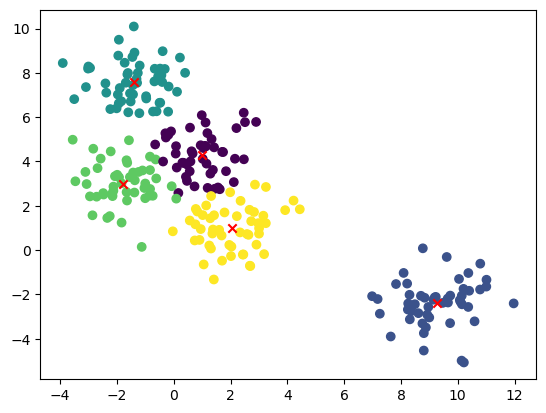

In [6]:
center=kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1],c=z)
plt.scatter(center[:,0],center[:,1],marker='x',c='r')
plt.show()

# 已知标签

In [8]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y,z)

0.8515604374978323

In [9]:
from sklearn.metrics import adjusted_mutual_info_score
adjusted_mutual_info_score(y,z)

0.8444084007538335

In [10]:
from sklearn.metrics import v_measure_score
v_measure_score(y,z)

0.8475828692292983

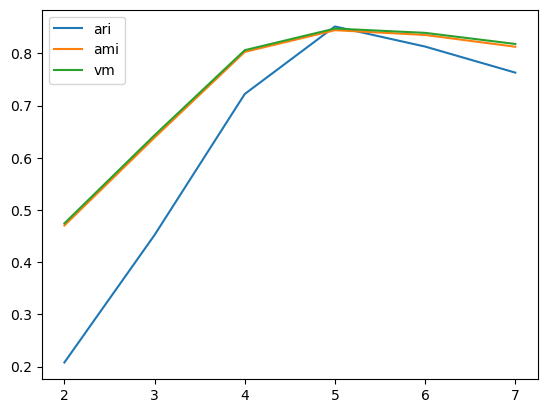

In [11]:
ari_curve=[]
ami_curve=[]
vm_curve=[]
clus=[2,3,4,5,6,7]
for n_clusters in clus:
    clusterer=KMeans(n_clusters=n_clusters,random_state=0).fit(X)
    z=clusterer.labels_
    ari_curve.append(adjusted_rand_score(y,z))
    ami_curve.append(adjusted_mutual_info_score(y,z))
    vm_curve.append(v_measure_score(y,z))
    
plt.plot(clus,ari_curve,label='ari')
plt.plot(clus,ami_curve,label='ami')
plt.plot(clus,vm_curve,label='vm')
plt.legend()
plt.show()

# 未知标签

## 轮廓系数

In [13]:
from sklearn.metrics import silhouette_score
kmeans=KMeans(n_clusters=5,random_state=0).fit(X)
cluster_labels=kmeans.labels_
si=silhouette_score(X,cluster_labels)
si

0.5529053851257539

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

def show_silhouette_plot(model,X):
    for n_clusters in[2,3,4,5,6,7]:
        fig,(pic1,pic2)=plt.subplot(1,2)
        fig.set_size_inches(15,5)
        model.n_clusters=n_clusters
        clusterer=model.fit(X)
        

## CHI

In [14]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X,y)

850.6346471314978

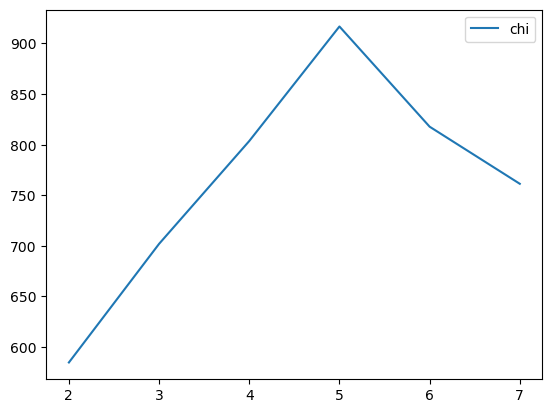

In [15]:
chi_curve=[]
clus=[2,3,4,5,6,7]
for n_clusters in clus:
    clusterer=KMeans(n_clusters=n_clusters,random_state=0).fit(X)
    z=clusterer.labels_
    chi_curve.append(calinski_harabasz_score(X,z))
    
plt.plot(clus,chi_curve,label='chi')
plt.legend()
plt.show()